# Isolation Forest Algorithm

## Libs imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.ensemble import IsolationForest as isfo
from sklearn import datasets

## Import dataset. (Same dataset as in the LOF algorithm)

In [2]:
df = pd.read_csv("g_data.csv", delim_whitespace=True, header=None, names=["x", "y", "cluster_id"])
df.head()

,x,y,cluster_id
0,0.109393,0.085409,Cluster1
1,0.082571,0.101796,Cluster1
2,0.084990,0.113641,Cluster1
3,0.114611,0.115524,Cluster1
4,0.097356,0.095484,Cluster1


In [3]:
df['id']=df.cluster_id.map({'Cluster1':'red', 'Cluster2':'green', 'Cluster3':'blue'})
df = df.drop(['cluster_id'], axis=1)
df.head()

,x,y,id
0,0.109393,0.085409,red
1,0.082571,0.101796,red
2,0.084990,0.113641,red
3,0.114611,0.115524,red
4,0.097356,0.095484,red


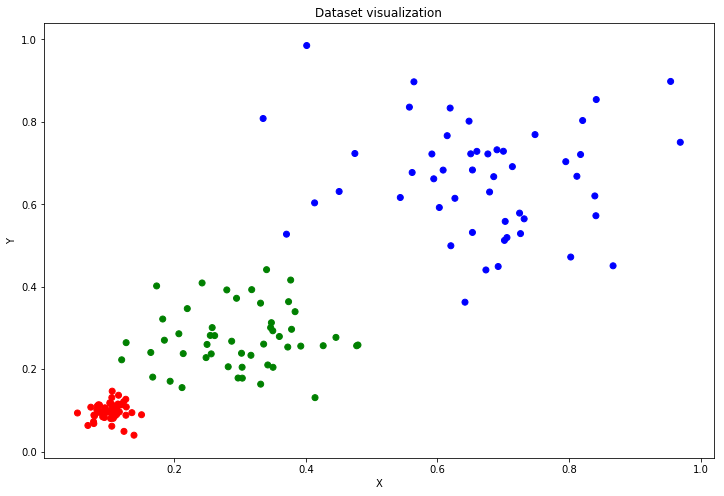

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(df.x, df.y, c=df.id)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset visualization');

In [5]:
df = df.drop(['id'], axis=1)
df.head()

,x,y
0,0.109393,0.085409
1,0.082571,0.101796
2,0.084990,0.113641
3,0.114611,0.115524
4,0.097356,0.095484


## For an unsupervized approach we set the contamination parameter to "auto"

In [6]:
rng = np.random.RandomState(50)
model = isfo(max_samples=150, random_state=rng, contamination='auto', behaviour="new", n_estimators=100)
rng.rand()

0.49460164553802144

### Fit the model and predict which data points are outliers/anomalies. Label with "1" are considered normal and "-1" label is an outlier/anomaly data point

In [7]:
isfo_outliers = model.fit_predict(df)
df['iso_forest_outliers']= isfo_outliers
df.head(10)

,x,y,iso_forest_outliers
0,0.109393,0.085409,1
1,0.082571,0.101796,1
2,0.084990,0.113641,1
3,0.114611,0.115524,1
4,0.097356,0.095484,1
5,0.086612,0.113084,1
6,0.107348,0.110213,1
7,0.078011,0.068105,1
8,0.102780,0.116474,1
9,0.073398,0.107834,1


## Visualize the data and their predictive anomaly points

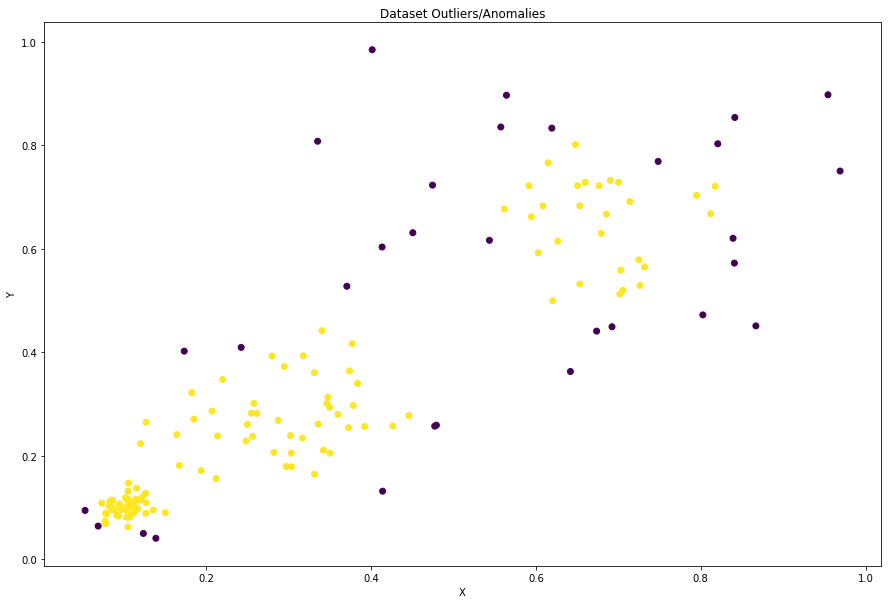

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(df.x, df.y, c=df.iso_forest_outliers)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Outliers/Anomalies');

## Count the normal and non normal data points

In [9]:
print('Normal points in Dataset:',np.count_nonzero(isfo_outliers > 0))
print('Abnormal Points in Dataset:',np.count_nonzero(isfo_outliers < 0))

Normal points in Dataset: 119
Abnormal Points in Dataset: 31


## Supervised approach

In [10]:
df = df.drop(['iso_forest_outliers'], axis=1)
anomaly_score = model.decision_function(df)
df['anomaly_scores']= anomaly_score
df.head()

,x,y,anomaly_scores
0,0.109393,0.085409,0.097515
1,0.082571,0.101796,0.098587
2,0.084990,0.113641,0.089018
3,0.114611,0.115524,0.107727
4,0.097356,0.095484,0.113270


In [11]:
print('Maximum normality score:', max(anomaly_score), 'Minimum normality score:',min(anomaly_score))

Maximum normality score: 0.12456592379108061 Minimum normality score: -0.15891546767154807


## Distribution score visualization

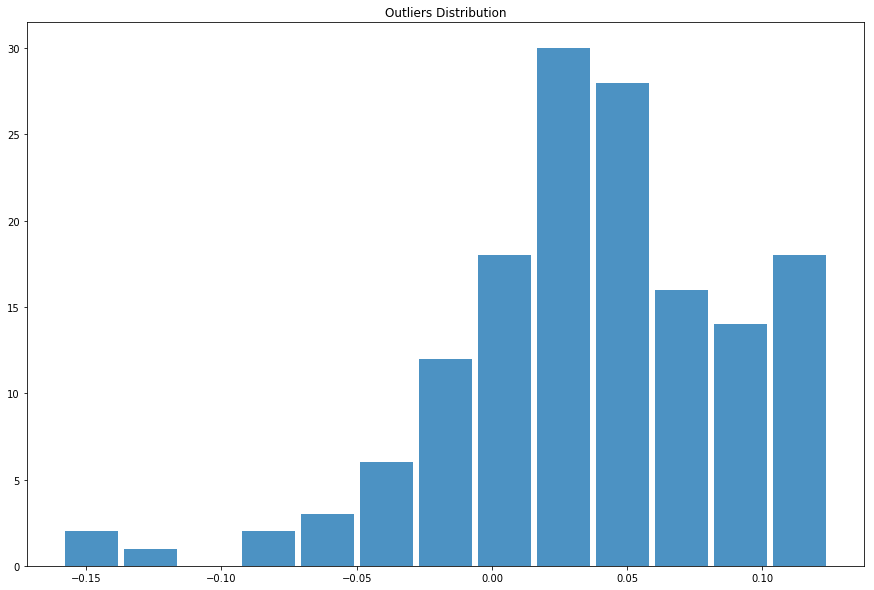

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(df.anomaly_scores, bins='auto', alpha=0.8,
         rwidth=0.9, align='mid',range=(min(anomaly_score), max(anomaly_score)));
plt.title('Outliers Distribution');

## Filter the data based on the score column

In [13]:
def filter_scores(x):
    if x < -0.01:
        return -1
    else:
        return 1
df['outliers_based_on_score'] = df.apply(lambda row: filter_scores(row['anomaly_scores']), axis=1)

In [14]:
df.head(15)

,x,y,anomaly_scores,outliers_based_on_score
0,0.109393,0.085409,0.097515,1
1,0.082571,0.101796,0.098587,1
2,0.084990,0.113641,0.089018,1
3,0.114611,0.115524,0.107727,1
4,0.097356,0.095484,0.113270,1
5,0.086612,0.113084,0.089852,1
6,0.107348,0.110213,0.114370,1
7,0.078011,0.068105,0.024021,1
8,0.102780,0.116474,0.106935,1
9,0.073398,0.107834,0.054991,1


## Scatter plot visualization of the data with their anomaly data points which we defined above

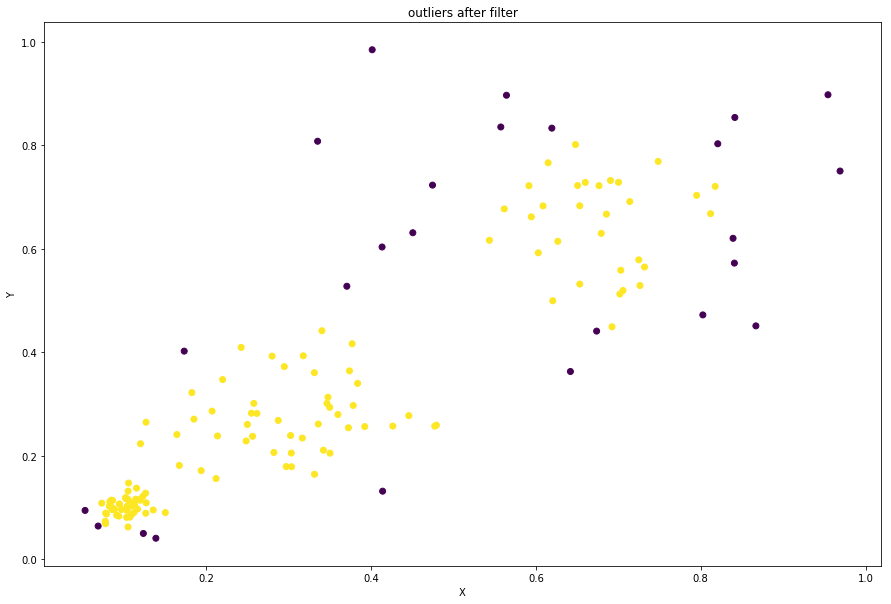

In [15]:
plt.figure(figsize=(15, 10))
plt.scatter(df.x, df.y, c=df.outliers_based_on_score)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('outliers after filter');

In [16]:
clean_data = df.loc[df['outliers_based_on_score'] != -1]
clean_data = clean_data.drop(['anomaly_scores','outliers_based_on_score'], axis=1)
clean_data.head()

,x,y
0,0.109393,0.085409
1,0.082571,0.101796
2,0.084990,0.113641
3,0.114611,0.115524
4,0.097356,0.095484


In [17]:
print('Original Data length:',len(df)
      ,'\nRemaining Data After Filtering:'
      ,len(clean_data),'\nPercentage drop (Round):'
      ,(round(((len(clean_data)-len(df))/len(df))*100)),'%')

Original Data length: 150 
Remaining Data After Filtering: 125 
Percentage drop (Round): -17 %
